<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/v2/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [624]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns




In [625]:
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 15)


# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [626]:
 #  YYYY-mm-dd
fechaInicio = "2020-01-01"
#today = "2022-11-01"
today = datetime.today().strftime('%Y-%m-%d')

In [627]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX", "ICPT"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV", "AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "V", "DIS", "PFE", "KO"]

''' NASDAQ, más rendimiento a mayor riesgo'''
activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"] # ESTAAAA

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
#activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']


''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
#activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

8

# DESCARGA Y VISUALIZACIÓN DE RENDIMIENTOS.
(Columna 'Adj Close') desde Yahoo Finance.

In [628]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
dataSet = yf.download(activos, start=fechaInicio, end=today)['Adj Close']
#dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame,
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  8 of 8 completed


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-01-02,334.429993,49.099998,294.239990,54.760349,NaN,31.850000,329.809998,59.754215
2020-01-03,331.809998,48.599998,290.850006,54.094296,NaN,31.639999,325.899994,58.797794
2020-01-06,333.709991,48.389999,290.820007,53.941284,NaN,31.690001,335.829987,59.044361
2020-01-07,333.390015,48.250000,290.089996,53.041210,NaN,31.844999,330.750000,59.759193
2020-01-08,337.869995,47.830002,292.660004,53.077217,NaN,31.910000,339.260010,59.871277
...,...,...,...,...,...,...,...,...
2023-06-14,479.529999,127.330002,299.989990,35.580002,6.40,58.480000,440.859985,429.970001
2023-06-15,490.910004,124.239998,297.829987,35.820000,6.59,58.799999,445.269989,426.529999
2023-06-16,495.179993,120.080002,297.480011,36.369999,6.48,58.450001,431.959991,426.920013


In [629]:
dataSet.max()

ADBE    688.369995
AMD     161.910004
BIIB    414.709991
INTC     63.348782
LCID     58.049999
MNST     59.939999
NFLX    691.690002
NVDA    438.079987
dtype: float64

### Gráfico de precios de períodos

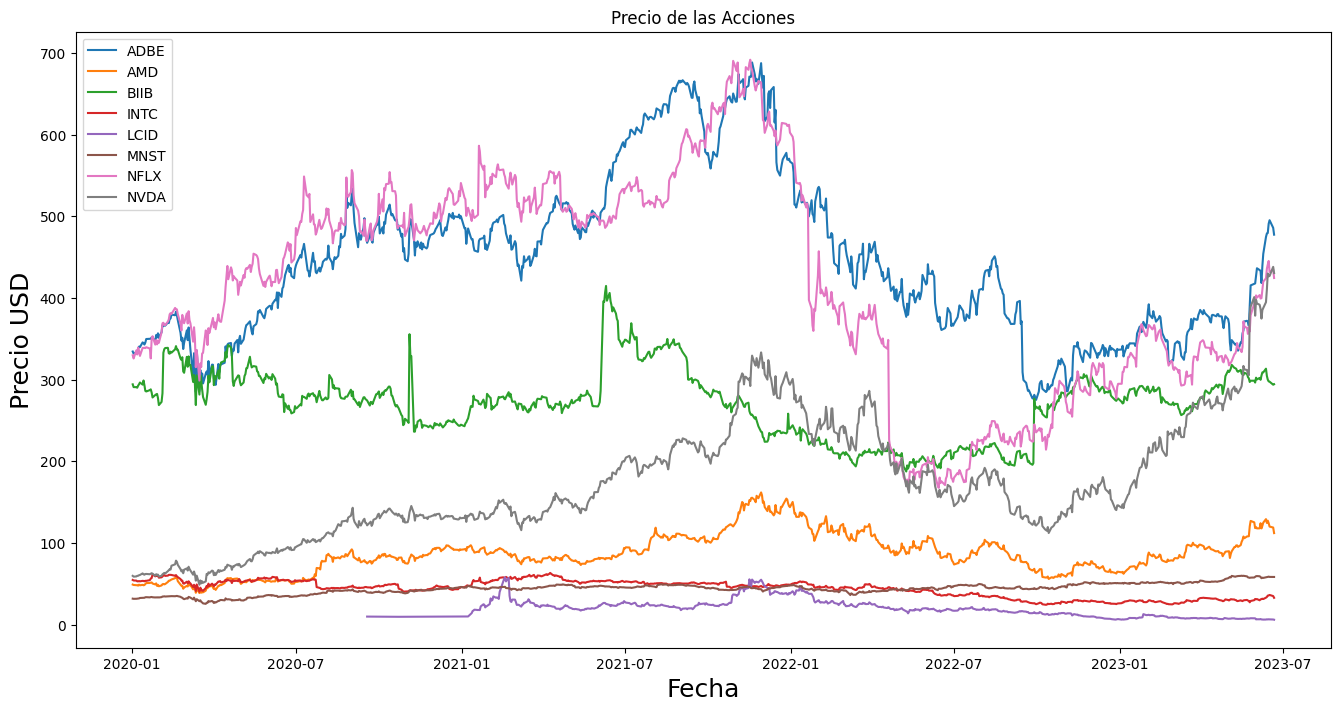

In [630]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [631]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento.head() * 100

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-09-21,1.730302,4.017085,-2.251539,-0.340752,-0.303344,-0.772250,3.700318,2.690897
2020-09-22,2.342104,-0.307936,1.662327,0.462591,0.202844,1.084468,0.783832,0.962684
2020-09-23,-3.367021,-3.822386,-0.205308,-2.262262,-0.303641,-1.817496,-4.185929,-4.067185
2020-09-24,-0.578244,1.458579,-0.793535,0.696449,-0.812182,0.269956,0.524851,1.849667
2020-09-25,2.589430,2.954363,1.199819,1.586648,0.409416,1.012822,2.071535,4.257784


### Calculo de esperanza, varianza y desvío estandar

In [632]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Esperanza,0.030713,0.110930,0.062683,-0.021381,0.109698,0.068152,0.039137,0.240467
Varianza,0.000546,0.001056,0.001174,0.000518,0.003710,0.000232,0.001018,0.001169
STD,2.336885,3.249589,3.426290,2.276531,6.090991,1.522900,3.189991,3.419650


### Distribución de rendimientos

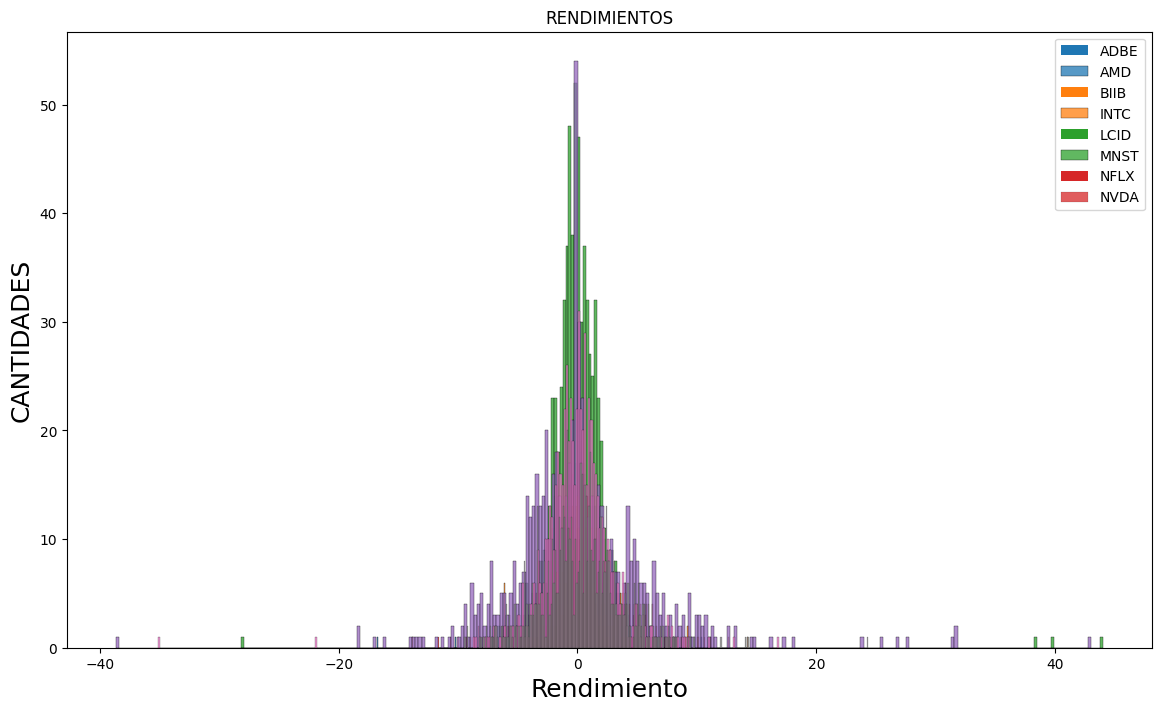

In [633]:
plt.figure(figsize=(14, 8))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [634]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
ADBE,0.000546,0.000470,0.000211,0.000238,0.000393,0.000174,0.000367,0.000538
AMD,0.000470,0.001056,0.000223,0.000377,0.000676,0.000177,0.000456,0.000893
BIIB,0.000211,0.000223,0.001174,0.000138,0.000286,0.000126,0.000247,0.000261
INTC,0.000238,0.000377,0.000138,0.000518,0.000311,0.000124,0.000252,0.000380
LCID,0.000393,0.000676,0.000286,0.000311,0.003710,0.000174,0.000466,0.000661
MNST,0.000174,0.000177,0.000126,0.000124,0.000174,0.000232,0.000133,0.000220
NFLX,0.000367,0.000456,0.000247,0.000252,0.000466,0.000133,0.001018,0.000515
NVDA,0.000538,0.000893,0.000261,0.000380,0.000661,0.000220,0.000515,0.001169


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [635]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

8

In [636]:
for x in range(5000):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

#### Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [637]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

ADBE  ->  7.19 %
AMD  ->  13.19 %
BIIB  ->  8.04 %
INTC  ->  14.37 %
LCID  ->  19.54 %
MNST  ->  16.75 %
NFLX  ->  14.51 %
NVDA  ->  6.42 %


Va a tener el siguiente rendimiento:

In [638]:
str(round(rPortafolio[0], 5)*100) + ' %'

'0.073 %'

Tiene el siguiente riesgo (%):

In [639]:
str(round(sdPortafolio[0], 3)*100) + ' %'

'2.1999999999999997 %'

###Generación de diccionarios
A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada acción con sus porcentajes de inversión

In [640]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [641]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.000728,0.022190,0.071891,0.131877,0.080439,0.143714,0.195364,0.167460,0.145097,0.064159
1,0.000957,0.021548,0.069421,0.207128,0.213597,0.109687,0.052183,0.090464,0.071095,0.186424
2,0.000929,0.025610,0.236534,0.039445,0.167056,0.024610,0.253921,0.034424,0.087048,0.156962
3,0.000563,0.025089,0.022094,0.061004,0.285082,0.245648,0.277366,0.050194,0.058036,0.000576
4,0.000563,0.022064,0.099111,0.055545,0.192357,0.179724,0.187026,0.067313,0.192980,0.025944
...,...,...,...,...,...,...,...,...,...,...
4995,0.000602,0.018714,0.005649,0.041476,0.241265,0.269454,0.114822,0.240610,0.018985,0.067739
4996,0.000647,0.019695,0.058927,0.187436,0.019073,0.198048,0.064746,0.209033,0.195559,0.067177
4997,0.000833,0.019940,0.033865,0.114390,0.142386,0.191204,0.084962,0.171269,0.095722,0.166203
4998,0.000848,0.024089,0.080169,0.050001,0.032942,0.057830,0.249227,0.218915,0.203760,0.107156


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

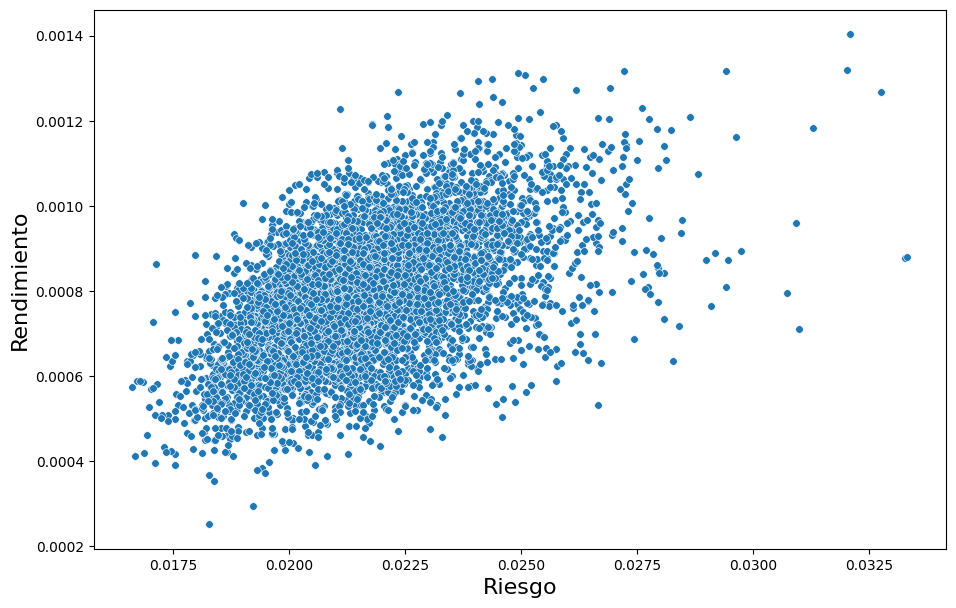

In [642]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# ANÁLISIS

### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [643]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento    0.000575
Riesgo         0.016612
USD ADBE       0.126673
USD AMD        0.103131
USD BIIB       0.095966
USD INTC       0.222072
USD LCID       0.049024
USD MNST       0.354382
USD NFLX       0.001890
USD NVDA       0.046862
Name: 94, dtype: float64

0.057470491386446394

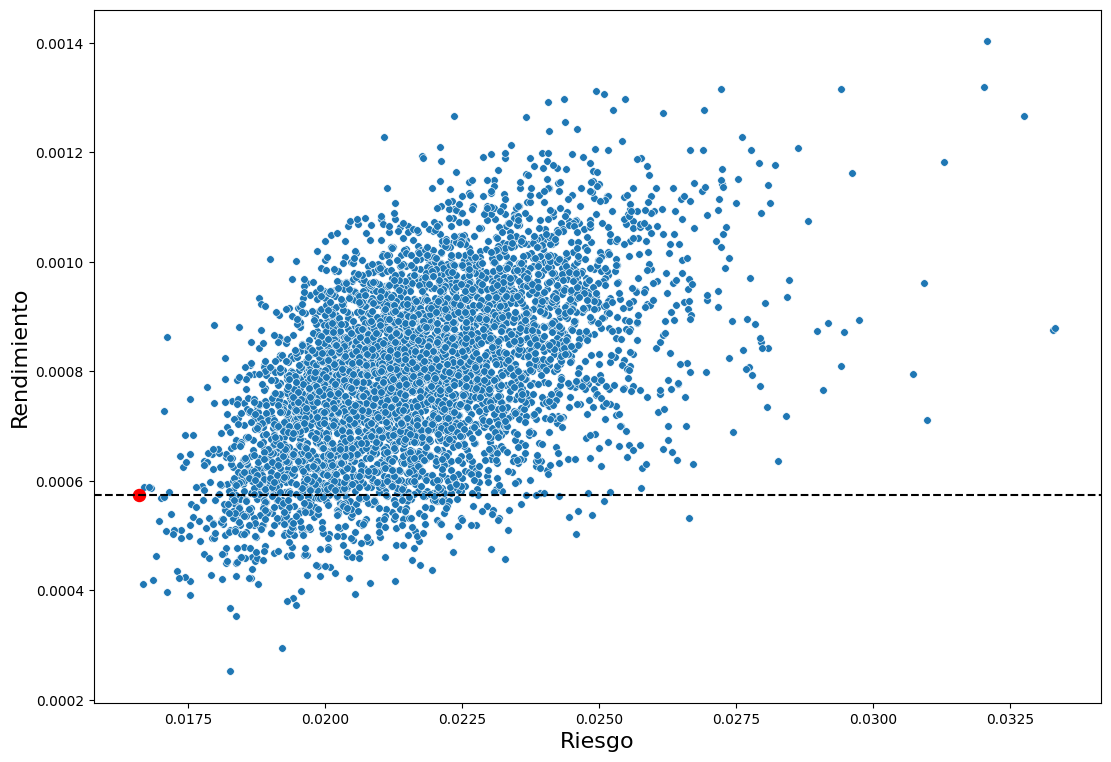

In [644]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

### Mayor rendimiento
Buscamos la inversión con mayor rendimiento de las pruebas.
A partir de este punto, todos los que se encuetran a la derecha de la línea punteada, serán irrelevantes porque tienene menor rendimiento y mayor riesgo.


In [645]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento    0.001403
Riesgo         0.032079
USD ADBE       0.029031
USD AMD        0.029415
USD BIIB       0.073913
USD INTC       0.064884
USD LCID       0.377338
USD MNST       0.046097
USD NFLX       0.014054
USD NVDA       0.365268
Name: 168, dtype: float64

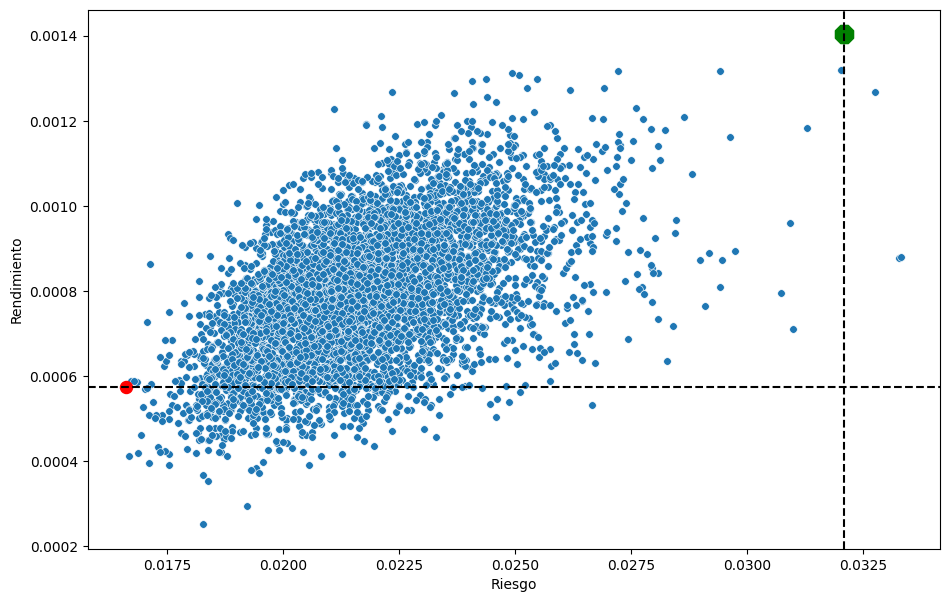

In [646]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Cuadrante óptimo
Selección de los portafolios óptimos cuadrante superior izquierdo

In [647]:
m = matrizPortafolio
m = m[(m["Rendimiento"] >= minimaVarianza[0]) & (m["Riesgo"] <= mayorRendimiento[1])]

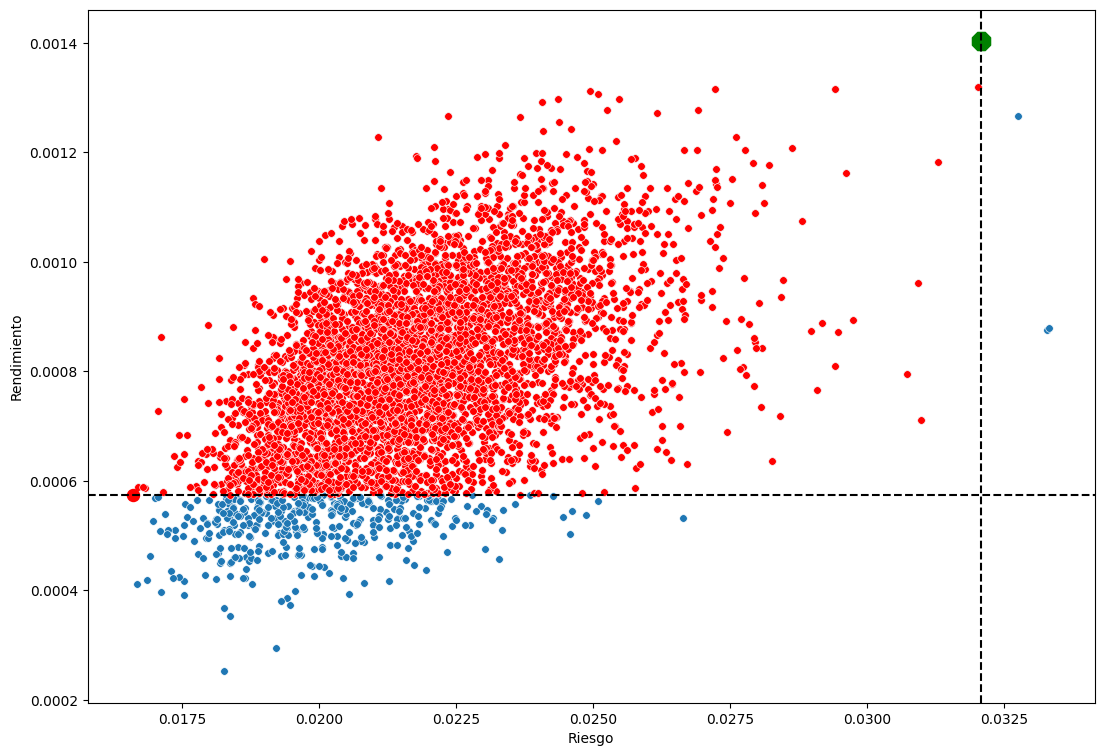

In [648]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Pendiente óptima

In [649]:
minimaVarianza

Rendimiento    0.000575
Riesgo         0.016612
USD ADBE       0.126673
USD AMD        0.103131
USD BIIB       0.095966
USD INTC       0.222072
USD LCID       0.049024
USD MNST       0.354382
USD NFLX       0.001890
USD NVDA       0.046862
Name: 94, dtype: float64

In [650]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  0.053564101369126475
Punto de corte -0.0003150964548741642


In [652]:
pendiente_optima = pd.DataFrame(columns = m.columns)
for index, row in m.iterrows():
    if row['Rendimiento'] >= pendiente * row['Riesgo'] + b:
       pendiente_optima = pendiente_optima.append(row)

pendiente_optima.reset_index(drop=True, inplace=True) ;

In [653]:
pendiente_optima

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.000957,0.021548,0.069421,0.207128,0.213597,0.109687,0.052183,0.090464,0.071095,0.186424
1,0.001101,0.022947,0.072694,0.053154,0.353734,0.000946,0.055326,0.058166,0.138117,0.267863
2,0.000829,0.019432,0.169375,0.073911,0.192358,0.149097,0.047289,0.158386,0.028754,0.180828
3,0.001088,0.025529,0.110167,0.142402,0.204437,0.011553,0.234175,0.084132,0.028111,0.185023
4,0.000896,0.020123,0.145963,0.134743,0.151065,0.047428,0.078384,0.193881,0.098596,0.149941
...,...,...,...,...,...,...,...,...,...,...
1840,0.000889,0.021577,0.162779,0.110712,0.126562,0.087428,0.155504,0.162911,0.046049,0.148055
1841,0.001027,0.021866,0.185725,0.051016,0.099359,0.076737,0.152166,0.188714,0.010012,0.236271
1842,0.000882,0.021838,0.100242,0.128523,0.136584,0.073869,0.137579,0.125778,0.155728,0.141697
1843,0.000795,0.020504,0.016726,0.107722,0.155618,0.153145,0.146755,0.204327,0.105962,0.109745


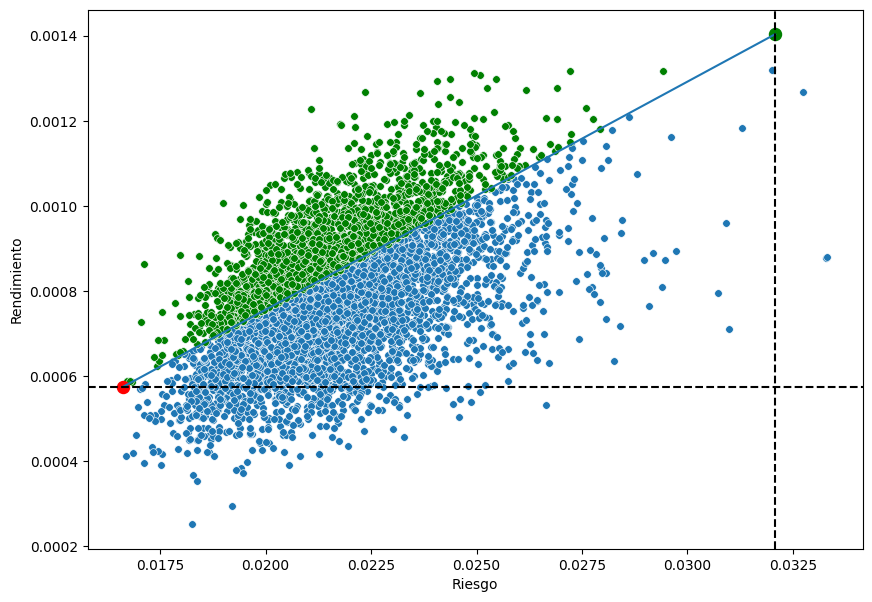

In [654]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=pendiente_optima, x = 'Riesgo', y='Rendimiento', color="green", s=30)


# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='.', s=300)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Definición de carteras según perfil de riesgo del inversor

 Borramos las carteras que no vamos a tomar

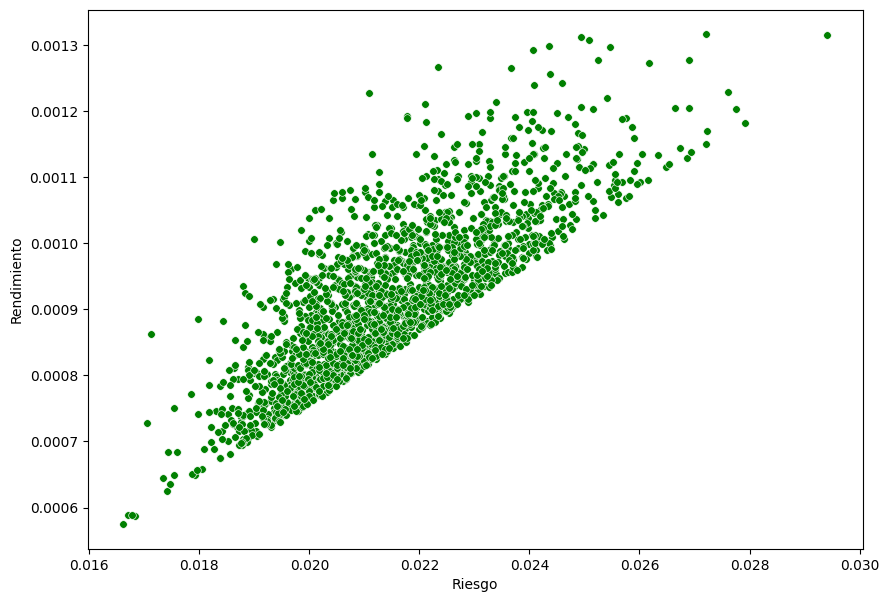

In [655]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

#plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])
#plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
#plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

#### Definir los 3 perfiles
Dividir en 3 sectores del gráfico según perfil del riesgo

In [656]:
division = (pendiente_optima['Riesgo'].max()  - pendiente_optima['Riesgo'].min()) / 3
division
bajo = pendiente_optima['Riesgo'].min() + division
medio = bajo + division

In [657]:
# Perfil Bajo
perfil_bajo = pendiente_optima[(pendiente_optima["Riesgo"] >= pendiente_optima["Riesgo"].min()) &
                 (pendiente_optima["Riesgo"] <= bajo)]
maximo_perfil_bajo = perfil_bajo.loc[perfil_bajo['Rendimiento'].idxmax()]
maximo_perfil_bajo_mensual = maximo_perfil_bajo.copy()
print(f"Máximo rendimiento para perfil bajo: \n {maximo_perfil_bajo} \n ---------------")

# Perfil Medio
perfil_medio = pendiente_optima[(pendiente_optima["Riesgo"] >= bajo) &
                 (pendiente_optima["Riesgo"] <= medio)]
maximo_perfil_medio = perfil_medio.loc[perfil_medio['Rendimiento'].idxmax()]
maximo_perfil_medio_mensual = maximo_perfil_medio.copy()
print(f"Máximo rendimiento para perfil Medio: \n {maximo_perfil_medio} \n ---------------")

# Perfil Alto
perfil_alto = pendiente_optima[pendiente_optima["Riesgo"] >= medio]
maximo_perfil_alto = perfil_alto.loc[perfil_alto['Rendimiento'].idxmax()]
maximo_perfil_alto_mensual = maximo_perfil_alto.copy()
print(f"Máximo rendimiento para perfil Alto: \n {maximo_perfil_alto} \n ---------------")

Máximo rendimiento para perfil bajo: 
 Rendimiento    0.001080
Riesgo         0.020735
USD ADBE       0.161802
USD AMD        0.046127
USD BIIB       0.214646
USD INTC       0.017907
USD LCID       0.051868
USD MNST       0.179429
USD NFLX       0.059479
USD NVDA       0.268742
Name: 1459, dtype: float64 
 ---------------
Máximo rendimiento para perfil Medio: 
 Rendimiento    0.001312
Riesgo         0.024936
USD ADBE       0.023614
USD AMD        0.290398
USD BIIB       0.051244
USD INTC       0.005330
USD LCID       0.116926
USD MNST       0.160211
USD NFLX       0.065915
USD NVDA       0.286362
Name: 264, dtype: float64 
 ---------------
Máximo rendimiento para perfil Alto: 
 Rendimiento    0.001316
Riesgo         0.027212
USD ADBE       0.036547
USD AMD        0.057746
USD BIIB       0.101702
USD INTC       0.020058
USD LCID       0.279954
USD MNST       0.159275
USD NFLX       0.031214
USD NVDA       0.313504
Name: 530, dtype: float64 
 ---------------


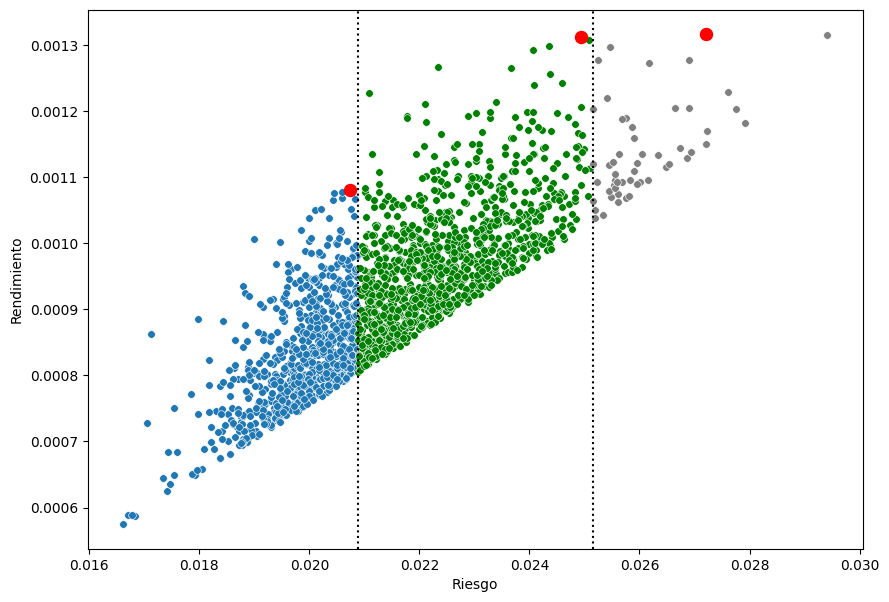

In [658]:
plt.figure(figsize=(10,7))

sns.scatterplot(data= perfil_bajo, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data= perfil_medio, x = 'Riesgo', y='Rendimiento', color='green', s=30)
sns.scatterplot(data= perfil_alto, x = 'Riesgo', y='Rendimiento', color='grey', s=30)

# Lineas verticales
plt.axvline(x=bajo, color='black', linestyle=':')
plt.axvline(x=medio, color='black', linestyle=':')

# Puntos máximos por perfil
plt.scatter(x=maximo_perfil_bajo[1], y=maximo_perfil_bajo[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_medio[1], y=maximo_perfil_medio[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_alto[1], y=maximo_perfil_alto[0], color='red', marker='.', s=300)

plt.show()

In [659]:
maximo_perfil_bajo = pd.DataFrame(maximo_perfil_bajo)
column_name = maximo_perfil_bajo.columns[0]
maximo_perfil_bajo.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_bajo['Total %'] = round(maximo_perfil_bajo['Total %'] * 100,2)
maximo_perfil_bajo['Total %'] = maximo_perfil_bajo['Total %'].astype(str) + " %"



In [660]:
maximo_perfil_medio = pd.DataFrame(maximo_perfil_medio)
column_name = maximo_perfil_medio.columns[0]
maximo_perfil_medio.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_medio['Total %'] = round(maximo_perfil_medio['Total %'] * 100,2)
maximo_perfil_medio['Total %'] = maximo_perfil_medio['Total %'].astype(str) + " %"


In [661]:
maximo_perfil_alto = pd.DataFrame(maximo_perfil_alto)
column_name = maximo_perfil_alto.columns[0]
maximo_perfil_alto.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_alto['Total %'] = round(maximo_perfil_alto['Total %'] * 100,2)
maximo_perfil_alto['Total %'] = maximo_perfil_alto['Total %'].astype(str) + " %"

In [662]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento DIARIO de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo.T)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio.T)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto.T)


--------------------------------------------------------
A continuación el rendimiento DIARIO de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.11 %,2.07 %,16.18 %,4.61 %,21.46 %,1.79 %,5.19 %,17.94 %,5.95 %,26.87 %



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.13 %,2.49 %,2.36 %,29.04 %,5.12 %,0.53 %,11.69 %,16.02 %,6.59 %,28.64 %



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.13 %,2.72 %,3.65 %,5.77 %,10.17 %,2.01 %,28.0 %,15.93 %,3.12 %,31.35 %


In [663]:
# Perfil Bajo Mensual

maximo_perfil_bajo_mensual = pd.DataFrame(maximo_perfil_bajo_mensual)

column_name = maximo_perfil_bajo_mensual.columns[0]
maximo_perfil_bajo_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_bajo_mensual = maximo_perfil_bajo_mensual.T


# Perfil Medio Mensual

maximo_perfil_medio_mensual = pd.DataFrame(maximo_perfil_medio_mensual)

column_name = maximo_perfil_medio_mensual.columns[0]
maximo_perfil_medio_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_medio_mensual = maximo_perfil_medio_mensual.T

# Perfil Alto Mensual

maximo_perfil_alto_mensual = pd.DataFrame(maximo_perfil_alto_mensual)

column_name = maximo_perfil_alto_mensual.columns[0]
maximo_perfil_alto_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_alto_mensual = maximo_perfil_alto_mensual.T

# Promedio de días de los meses en el año
dias_de_meses = 30.41

maximo_perfil_bajo_mensual['Rendimiento'] = ((1 + maximo_perfil_bajo_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_medio_mensual['Rendimiento'] = ((1 + maximo_perfil_medio_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_alto_mensual['Rendimiento'] = ((1 + maximo_perfil_alto_mensual['Rendimiento'] ) ** dias_de_meses - 1)

maximo_perfil_bajo_mensual.loc['Total %'] = maximo_perfil_bajo_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_medio_mensual.loc['Total %'] = maximo_perfil_medio_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_alto_mensual.loc['Total %'] = maximo_perfil_alto_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))



In [664]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento MENSUAL de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto_mensual)


--------------------------------------------------------
A continuación el rendimiento MENSUAL de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,3.34%,2.07%,16.18%,4.61%,21.46%,1.79%,5.19%,17.94%,5.95%,26.87%



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,4.07%,2.49%,2.36%,29.04%,5.12%,0.53%,11.69%,16.02%,6.59%,28.64%



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,4.08%,2.72%,3.65%,5.77%,10.17%,2.01%,28.00%,15.93%,3.12%,31.35%


In [665]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir la lista de acciones
activos = ["AMD", "LCID", "MNST", "BIIB", "NVDA"]

# Obtener los datos históricos de las acciones
data = yf.download(activos, start="2020-01-01", end="2022-12-31")["Adj Close"]

# Calcular los rendimientos diarios
returns = data.pct_change()

# Eliminar la primera fila (NaN) de los rendimientos
returns = returns.dropna()

# Definir la columna de predicción
target_column = "LCID"

# Dividir los datos en conjunto de entrenamiento y prueba
X = returns.drop(target_column, axis=1)
y = returns[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones para el próximo mes
next_month_data = yf.download(activos, start="2022-12-01", end="2022-12-31")["Adj Close"]
next_month_returns = next_month_data.pct_change().dropna()
next_month_features = next_month_returns.drop(target_column, axis=1)
print(next_month_features)
next_month_predictions = model.predict(next_month_features.iloc[:, :4].values)

# Imprimir las predicciones
print("Predicción de precio para el próximo mes:")
print(f"{target_column}: {next_month_predictions[0]}")

# Evaluar el rendimiento del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
                 AMD      BIIB      MNST      NVDA
Date                                              
2022-12-02 -0.032266 -0.009773  0.007651 -0.015115
2022-12-05 -0.018138 -0.020575 -0.017974 -0.015762
2022-12-06 -0.045504 -0.004372 -0.007145 -0.037508
2022-12-07 -0.001850  0.002333 -0.002070  0.008319
2022-12-08  0.004705 -0.010440  0.003062  0.065074
2022-12-09 -0.026678 -0.012902 -0.014773 -0.009785
2022-12-12  0.030325  0.018292  0.007797  0.031410
2022-12-13  0.013867  0.002237 -0.003769  0.030624
2022-12-14 -0.037962 -0.007520  0.014536 -0.022023
2022-12-15 -0.034818 -0.019408 -0.022080 -0.040851
2022-12-16 -0.016834  0.005433  0.011340 -0.022475
2022-12-19 -0.012536 -0.002105 -0.003572 -0.019130
2022-12-20  0.007122  0.011006  0.007369 -0.010397
2022-12-21  0.040430 -0.002261  0.007809  0.025863
2022-12-22 -0.056442 -0.021788 -0.011182 -0.07

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
